# Part I - (Ford GoBike System Data)
## by (Richard Oloyede)

## Introduction


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

%matplotlib inline

In [3]:
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))
# Change the current working directory
os.chdir('C:\\Users\\Richard\\Documents\\csv files')
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\Richard
Current working directory: C:\Users\Richard\Documents\csv files


In [4]:
#Read the csv Ford GoBike Dataset 
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
#getting the structure of the gobike dataframe
gobike.shape

(183412, 16)

In [6]:
#displays a summary statistics of the dataset
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
#displays summary of gobike dataframe
gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [8]:
#displays the first 3 rows of the dataframe
gobike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


#### Data Wrangling

- change the datatype of start_time,end_time column to datatime 
- change the datatype of start_station_id, end_station_id,bike_id to object
- Remove unwanted columns such as start_station and end_station latitude and longitude
- create a new column for day,month and year
- creating a new column called member_age from member_birth year column


In [9]:
#creating a copy of the dataframe from wrangling
gobike_copy = gobike.copy()

In [10]:
#Remove the unwanted columns
gobike_copy = gobike_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis=1)


In [11]:
#change the datatype of start_time,end_time column to datatime
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'],errors='coerce')
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'],errors='coerce')

#checking the data type of the various columns
gobike_copy[['start_time','end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [12]:
#change the datatype of start_station_id, end_station_id,bike_id to object using a for loop
for i in gobike_copy:
    for j in ['start_station_id','end_station_id','bike_id']:
        if i == j:
            gobike_copy[i] = gobike_copy[i].astype(str)
        
#checking the data type of the various columns                                                                           
gobike_copy[['start_station_id','end_station_id','bike_id']].dtypes    

start_station_id    object
end_station_id      object
bike_id             object
dtype: object

In [13]:
#creating a new column for start and end time for day,month,year,hour
for i in gobike_copy:
    for j in ['start_time','end_time']:
        if i == j:
            gobike_copy[('day_')+i] = gobike_copy[i].dt.day
            gobike_copy[('month_')+i] = gobike_copy[i].dt.month
            gobike_copy[('year_')+i] = gobike_copy[i].dt.year
            gobike_copy[('hour_')+i] = gobike_copy[i].dt.hour
gobike_copy.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_start_time,month_start_time,year_start_time,hour_start_time,day_end_time,month_end_time,year_end_time,hour_end_time
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,28,2,2019,17,1,3,2019,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,28,2,2019,18,1,3,2019,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,28,2,2019,12,1,3,2019,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,28,2,2019,17,1,3,2019,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,28,2,2019,23,1,3,2019,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,28,2,2019,23,1,3,2019,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,28,2,2019,23,1,3,2019,0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,28,2,2019,23,1,3,2019,0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,28,2,2019,23,1,3,2019,0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,No,28,2,2019,23,1,3,2019,0


In [14]:
#sum of missing value in dataframe
gobike_copy.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
end_station_id                0
end_station_name            197
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
day_start_time                0
month_start_time              0
year_start_time               0
hour_start_time               0
day_end_time                  0
month_end_time                0
year_end_time                 0
hour_end_time                 0
dtype: int64

In [15]:
#creating a new column member age
current_year = 2019
member_age = []
for i in gobike_copy['member_birth_year']:
    member_age.append(2019-i)
gobike_copy['member_age'] = member_age


In [16]:
#changing the column data type
gobike_copy['member_birth_year'] = gobike_copy['member_birth_year'].astype(int,errors = 'ignore')
gobike_copy['member_age'] = gobike_copy['member_age'].astype(int,errors= 'ignore')

In [17]:
#summary details of the wrangled dataset
gobike_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   end_station_id           183412 non-null  object        
 6   end_station_name         183215 non-null  object        
 7   bike_id                  183412 non-null  object        
 8   user_type                183412 non-null  object        
 9   member_birth_year        175147 non-null  float64       
 10  member_gender            175147 non-null  object        
 11  bike_share_for_all_trip  183412 non-null  object        
 12  day_start_time  



> The Ford GoBike System Data contains 12 features ('duration_sec','start_time','end_time','start_station_id','start_station_name','end_station_id','end_station_name','bike_id','user_type','member_birth_year', 'member_gender','bike_share_for_all_trip') and 183,412 datapoint for individauls in a bike-sharing system covering the greater San Francisco Bay area.


- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?
    


I think the various features below should help in my investigation of the dataset
- duration_sec
- start_time
- end_time
- user_type
- member_gender

## Univariate Exploration



In [18]:
#getting a detailed summary of the duration_sec column
np.log10(gobike_copy['duration_sec'].describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

Text(0.5, 1.0, 'Bike Ride Duration')

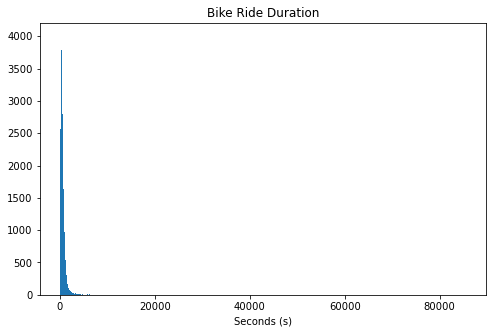

In [19]:
#setting up the bins
bins = np.arange(60,85500,15)

#creating the figure size of the plot
plt.figure(figsize=[8, 5])

#Histogram plot of the duration column
plt.hist(data=gobike_copy,x='duration_sec',bins=bins);
plt.xlabel('Seconds (s)');
plt.title('Bike Ride Duration')

Text(0.5, 1.0, 'Bike Ride Duration')

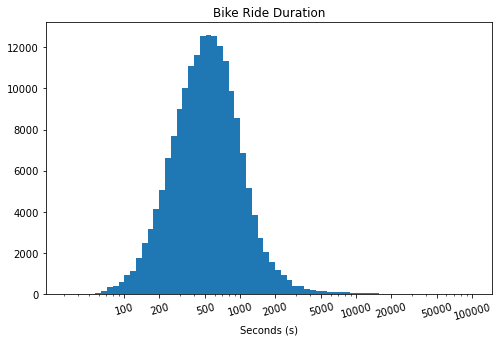

In [20]:
#setting up the bins
bins = 10**np.arange(1.5,5.0+0.05,0.05)

#creating the figure size of the plot
plt.figure(figsize=[8, 5])

#Histogram plot of the duration column
plt.hist(data=gobike_copy,x='duration_sec',bins=bins);
plt.xscale('log');
xticks = [100,200,500,1000,2000,5000,10000,20000,50000,100000]
labels = ['{:}'.format(v) for v in xticks]
plt.xticks(xticks,labels,rotation=15);
plt.xlabel('Seconds (s)');
plt.title('Bike Ride Duration')

Investigating furthur on the smaller bin sizes

C:\Users\Richard\AppData\Local\Temp\ipykernel_5684\2630871201.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,5000]);


Text(0.5, 1.0, 'Bike Ride Duration')

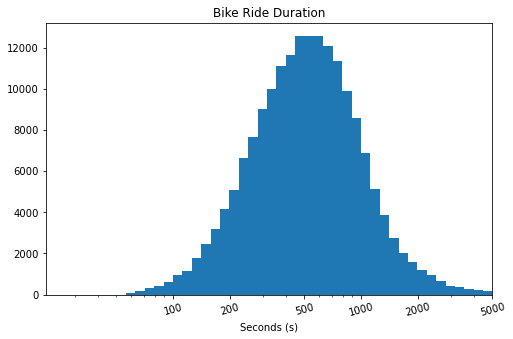

In [21]:
#setting up the bins
bins = 10**np.arange(1.5,5.0+0.05,0.05)

#creating the figure size of the plot
plt.figure(figsize=[8, 5])

#Histogram plot of the duration column
plt.hist(data=gobike_copy,x='duration_sec',bins=bins);
plt.xscale('log');
xticks = [100,200,500,1000,2000,5000,10000,20000,50000,100000]
labels = ['{:}'.format(v) for v in xticks]
plt.xticks(xticks,labels,rotation=15);
plt.xlim([0,5000]);
plt.xlabel('Seconds (s)');
plt.title('Bike Ride Duration')

The Bike ride duration has a long-tail distribution which is highly skewed to the right with most of individual bike ride durations at the low end of the duration and few at high end of the duration. When plotted on a log-scale we can see most to the duration bike rides are between 1000secs(16.33mins) and 500secs(8.33mins),while very fews indvidual rode on the bike for more than 2000secs(5.55hrs). This might be worth looking into 

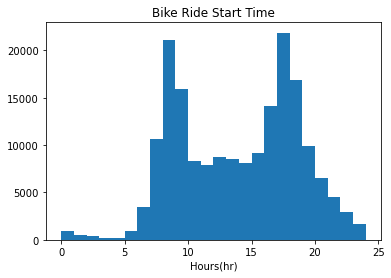

In [22]:
#historgram plot of the bike ride start time
bins = np.arange(0,24+1,1)
plt.hist(data=gobike_copy,x='hour_start_time',bins=bins);
plt.xlabel('Hours(hr)');
plt.title('Bike Ride Start Time');


The distribution of the hours individual started the bike ride looks bimodal with the hours 8:00 and 17:00 being the most time individual start their bike,which correspond to the time individual go to work and finish from work,while the hours between 0:00 and 5:00 getting the lowest frequency of time which expected. 
    The hours 10:00 to 16:00 getting an average frequency of time people borrow bikes which is also expected as its usually working hours 

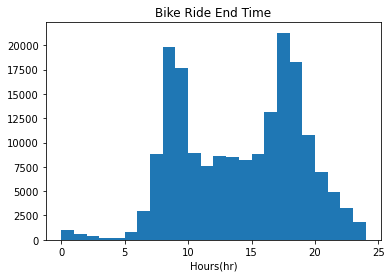

In [23]:
#histogram of the bike ride end time
bins = np.arange(0,24+1,1)
plt.hist(data=gobike_copy,x='hour_end_time',bins=bins);
plt.xlabel('Hours(hr)');
plt.title('Bike Ride End Time');


The Bike Ride time follows the same distribution as the Bike start time distribution with the time 8:00 and 17:00 being the most hours individuals end their rides

In [24]:
#getting a statistic distribution of the column
gobike_copy['member_age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

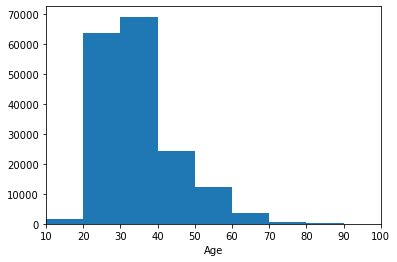

In [25]:
#histogram plot of members age
bins = np.arange(10,140+10,10)
plt.hist(data=gobike_copy,x='member_age',bins=bins);
plt.xlabel('Age')
plt.xlim([10,100]);

The plot above shows a right skewed distribution, where the most majority of individual using the GoBike Sharing System are in the range of age 20-40 which is reasonable

Text(0, 0.5, 'Frequency')

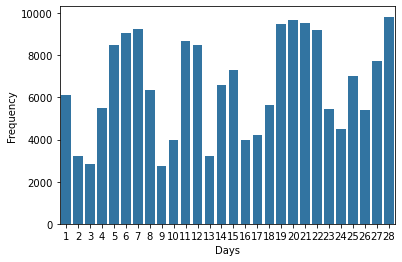

In [26]:
#histogram plot
base_color = sns.color_palette()[0]
sns.countplot(data=gobike_copy,x='day_start_time',color=base_color)
plt.xlabel('Days')
plt.ylabel('Frequency')

The above plot shows the days and the amounts of rides that occured in the month of febuary with days <b>6,7,19,20,21,28</b> being the days above 9000 rides

In [55]:
#top 5 days with most ride
gobike_copy['day_start_time'].value_counts()[0:5]

28    9829
20    9667
21    9536
19    9467
7     9234
Name: day_start_time, dtype: int64

with the top 5 days <b>28,20,21,19,7</b> being the days with the most rides respectively

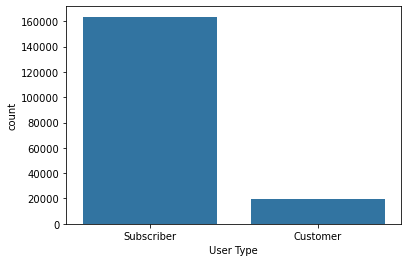

In [28]:
#countplot for the type of bike users in the dataset
base_color = sns.color_palette()[0]
order=gobike_copy['user_type'].value_counts().index
sns.countplot(data=gobike_copy,x='user_type',color=base_color,order=order);
plt.xlabel('User Type');

This plot clearly shows majority of the individuals using the  GoBike sharing system are does who subscriber with  __ percentage of the individual are subscribers

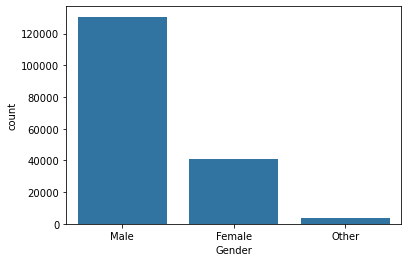

In [29]:
#barplot for the gender categories in the dataframe
base_color = sns.color_palette()[0]
order=gobike_copy['member_gender'].value_counts().index
sns.countplot(data=gobike_copy,x='member_gender',color=base_color,order=order);
plt.xlabel('Gender');

The plots shows that the majority of individuals using the GoBike sharing system are identified by Male's,followed by Female's and others. percentage ___ , ___ and ___ respectively

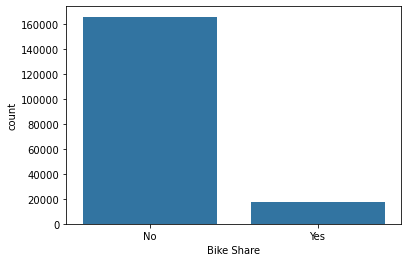

In [30]:
#barplot for the  categories in the dataframe
base_color = sns.color_palette()[0]
#order=gobike_copy['member_gender'].value_counts().index
sns.countplot(data=gobike_copy,x='bike_share_for_all_trip',color=base_color);
plt.xlabel('Bike Share');

This plot shows that majority of the individual does not like sharing the bike or participate in bike sharing trip

In [31]:
#converting the column into strings in other to perform from slicing operation
gobike_copy['start_time'] = gobike_copy['start_time'].astype(str)
gobike_copy['end_time'] = gobike_copy['end_time'].astype(str)

In [32]:
#slicing the columns to only display year,month and day
gobike_copy['start_week_day'] = gobike_copy['start_time'].str[:10]
gobike_copy['end_week_day'] = gobike_copy['end_time'].str[:10]

In [33]:
#converting the column back to datetime after slicing operation
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'],errors='coerce')
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'],errors='coerce')

gobike_copy['start_week_day'] = pd.to_datetime(gobike_copy['start_week_day'])
gobike_copy['end_week_day'] = pd.to_datetime(gobike_copy['end_week_day'])

In [34]:
#creating a new columns in the dataframe for the weekdays of the week
gobike_copy['start_week_day'] = gobike_copy['start_week_day'].dt.day_name()
gobike_copy['end_week_day'] = gobike_copy['end_week_day'].dt.day_name()

In [35]:
#creating a ctergorical class
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
days_classes = pd.api.types.CategoricalDtype(ordered=True,categories=days)

#changing the datatype of the variables
gobike_copy['start_week_day'] = gobike_copy['start_week_day'].astype(days_classes)
gobike_copy['end_week_day'] = gobike_copy['end_week_day'].astype(days_classes)

In [36]:
#display the first 5 roles
gobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,...,month_start_time,year_start_time,hour_start_time,day_end_time,month_end_time,year_end_time,hour_end_time,member_age,start_week_day,end_week_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,...,2,2019,17,1,3,2019,8,35.0,Thursday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,...,2,2019,18,1,3,2019,6,NaN,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,...,2,2019,12,1,3,2019,5,47.0,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,...,2,2019,17,1,3,2019,4,30.0,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,...,2,2019,23,1,3,2019,0,45.0,Thursday,Friday


Text(0, 0.5, 'Frequency')

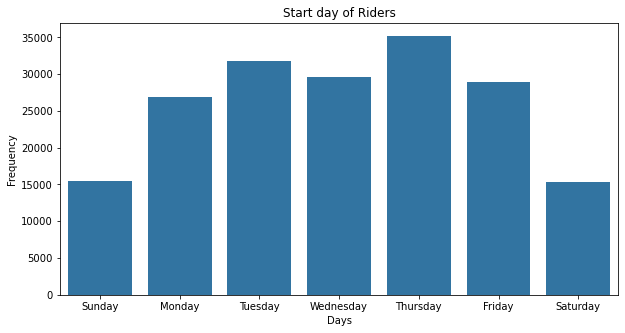

In [37]:
#display the countplot for the days of the month of when rides starts a ride
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=[10, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=gobike_copy,x='start_week_day',color=base_color,order=order);
plt.title('Start day of Riders')
plt.xlabel('Days')
plt.ylabel('Frequency')

The plot above reveals that the highest day an individual rider books a ride is <b>Thursday</b>, which is reasonab

Text(0, 0.5, 'Frequency')

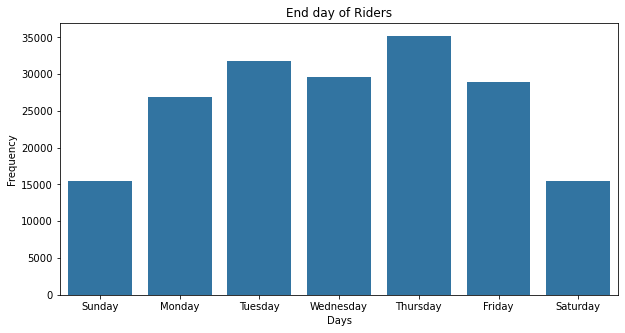

In [38]:
#display the countplot for the days of the month of when rides ends a ride
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize=[10, 5])
base_color = sns.color_palette()[0]
sns.countplot(data=gobike_copy,x='end_week_day',color=base_color,order=order);
plt.title('End day of Riders')
plt.xlabel('Days')
plt.ylabel('Frequency')

The above plot shows that Thursday is the day most indiviual end thier bike ride or return their bikes to the nearest station

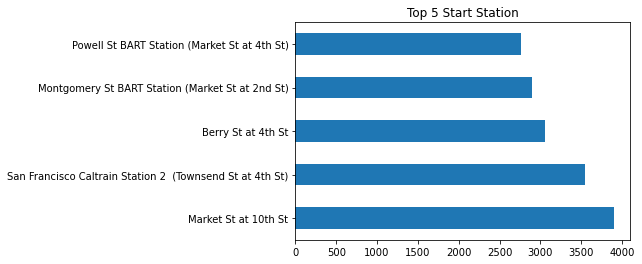

In [39]:
#barplot of the first 5 highest value of the column
gobike_copy['start_station_name'].value_counts()[:5].plot(kind='barh');
plt.title('Top 5 Start Station');


The above plot indicate the most used station for borrowing a bike.

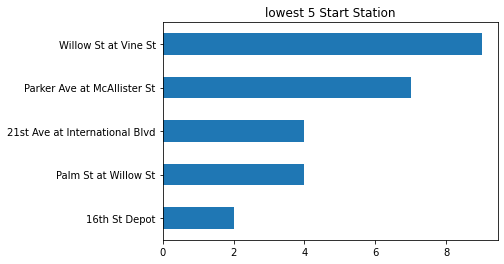

In [40]:
#barplot of the lowest 5 values of the column
gobike_copy['start_station_name'].value_counts(ascending=True)[:5].plot(kind='barh');
plt.title('lowest 5 Start Station');

The above plot shows the least stations used for borrowing bikes

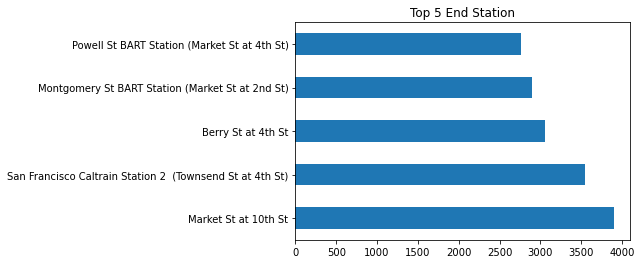

In [41]:
#barplot of the Highest 5 values of the column
gobike_copy['start_station_name'].value_counts()[:5].plot(kind='barh');
plt.title('Top 5 End Station');


The plot above depecit the 5 highest station an individuals used in returning or ending there bike ride service. With <b> Market St at 10th</b> St being the station that receives most individual or wants to end their bike ride

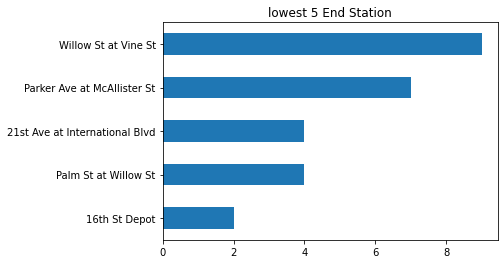

In [42]:
#barplot of the lowest 5 values of the column
gobike_copy['start_station_name'].value_counts(ascending=True)[:5].plot(kind='barh');
plt.title('lowest 5 End Station');

The plot above depecit the 5 lowest station an individuals used in returning or ending there bike ride service. With <b> Willow Station at Vine 10th</b> St being the station that receives least individual or wants to end their bike ride

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variable Bike Ride Duration  was too skewed to the right. so the data was re-plotted under log transform, under the transformation the data was symmetrical with the mean in between 500-800. with some outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The start and end time variable was used to extract and create a new columns for they weekdays in which the fall into to further help us in understanding our interest of features

## Bivariate Exploration


To start off with, I want to look at the pairwise correlations present between features in the data.

In [43]:
numeric_vars = ['duration_sec','hour_start_time','hour_end_time','day_start_time','day_end_time','member_age']
categoric_vars = ['user_type','member_gender','start_week_day','end_week_day','bike_share_for_all_trip']

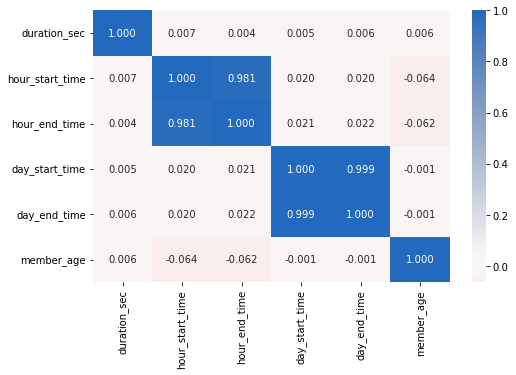

In [44]:
#correlation of the numeric variables
plt.figure(figsize = [8, 5])
sns.heatmap(gobike_copy[numeric_vars].corr(),annot=True,fmt="0.3f",cmap='vlag_r',center=0);
plt.show()

gobike_copy.shape= (183412, 23)
gobike-copy.samp= (1000, 23)


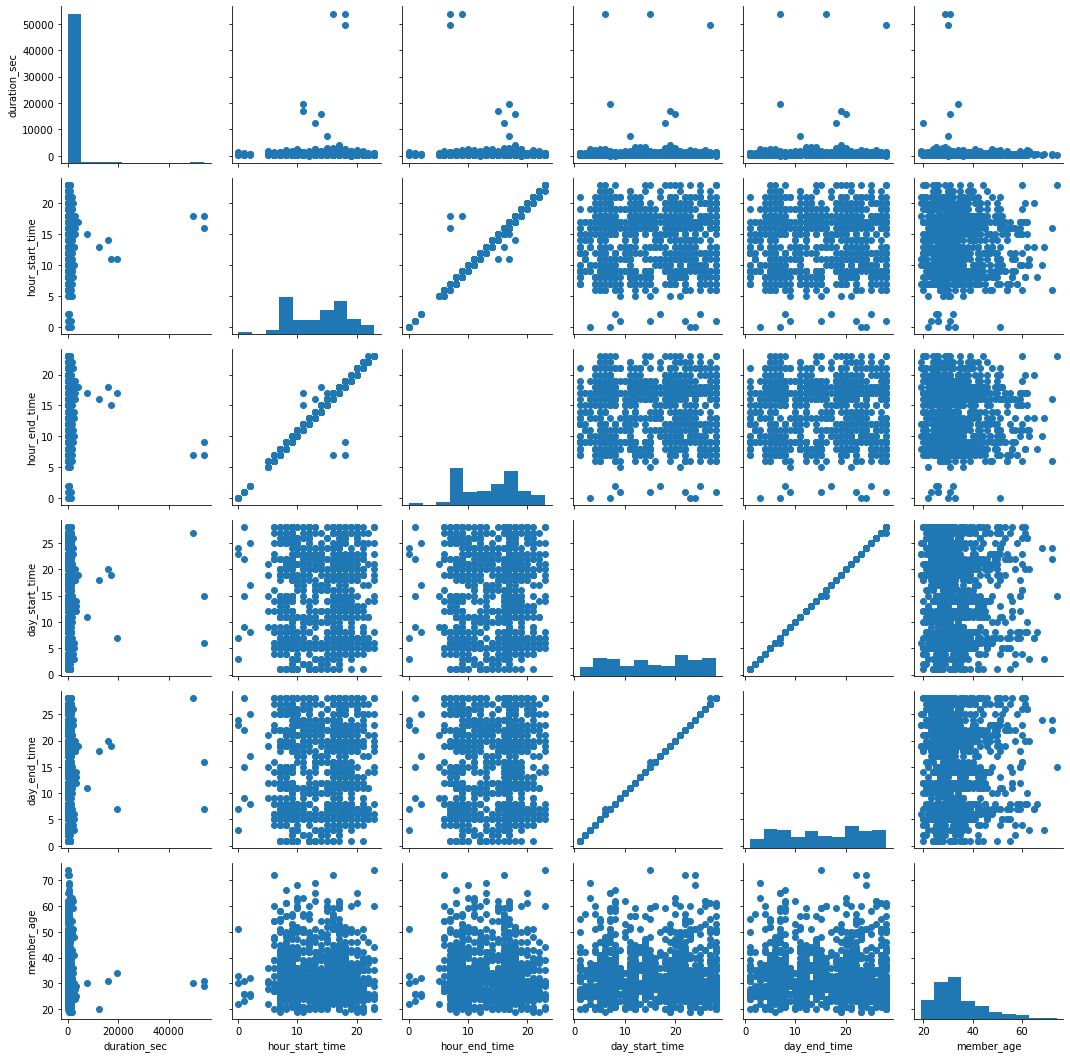

In [45]:
#faceting: plot matrix with sample of 1000 so the plots are clearer and they render faster
print("gobike_copy.shape=",gobike_copy.shape)
gobike_copy_samp = gobike_copy.sample(n=1000,replace=True)
print('gobike-copy.samp=',gobike_copy_samp.shape)


g = sns.PairGrid(data=gobike_copy_samp,vars=numeric_vars);
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

There is close no(zero) correlation between the Bike ride duration and other numeric variables. further analysis should be taken to see if any other qualitative variable influences the bike ride duration

The appears to be a very strong correlation between hour_start_time and hour_end_time i.e (the relationship between the time an individual start and end a bike ride is positively correlated) which implies the time an individual will end a bike ride can be deduced by the time the individual start the ride

Also strong positive correlation between the day_start_time and day_end_time i.e it can be predicted the day an individual will end a ride based on the day the individual starts the ride

In [46]:
#mean average ride
gobike_copy['duration_sec'].mean()

726.078435434977

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

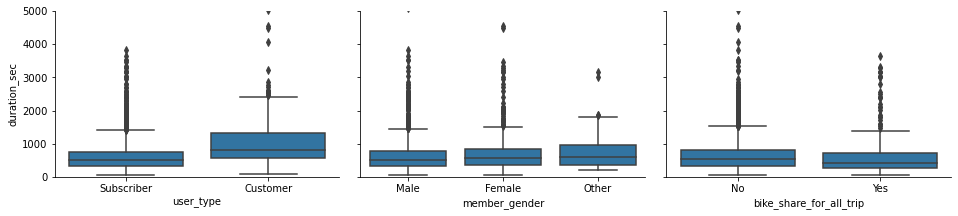

In [47]:
#generating sample from the data
gobike_copy_samp = gobike_copy.sample(n=3000,replace=True)

#creating a box grid function
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    plt.ylim([0,5000])

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = gobike_copy_samp, y_vars = ['duration_sec'], x_vars = ['user_type','member_gender','bike_share_for_all_trip'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

There appears the be a positive correlation between the duration time and the user type. while there is no relation between the duration time and the members gender or if the member shares a bike ride or not.

further analysis will be done on duration_sec and user_type in the multivariate section 

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

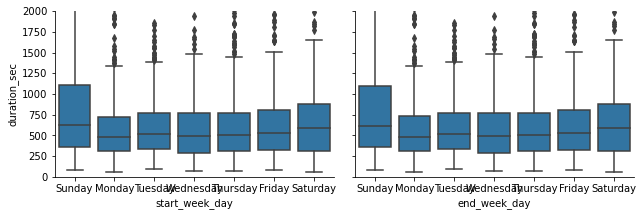

In [48]:
#generating a sample data
gobike_copy_samp = gobike_copy.sample(n=3000,replace=True)

#creatind an ordered list of week days
order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

#faceting
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = gobike_copy_samp, y_vars = ['duration_sec'], x_vars = ['start_week_day','end_week_day'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.ylim([0,2000])
plt.show();

The above plot shows longer bike duration ride during the weekends such as high duration rides on <b>Friday,Saturday,Sunday</b>

<b> lets look at the relatioship between the categorial variables </b>

<AxesSubplot:xlabel='member_gender', ylabel='count'>

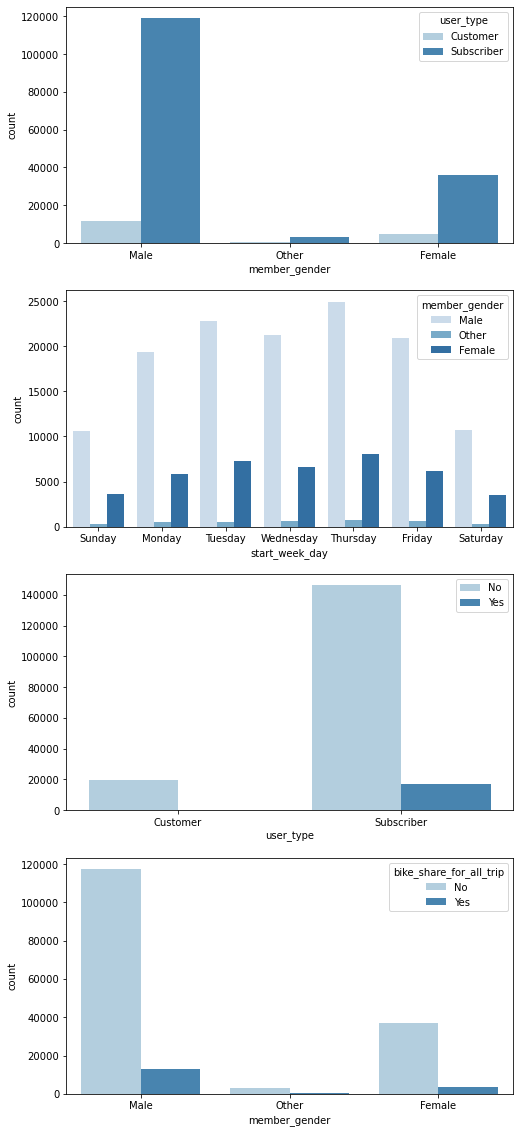

In [49]:
#displaying subplots of catergorical variables 
plt.figure(figsize = [8,20])

#subplot1: member_gender vs user_type
plt.subplot(4,1,1)
sns.countplot(data=gobike_copy,x='member_gender',hue='user_type',palette='Blues')

#subplot2: start_week_day vs gender
plt.subplot(4,1,2)
sns.countplot(data=gobike_copy,x='start_week_day',hue='member_gender',palette='Blues',order=order)

#subplot3: user_type vs bike_share_for_all
plt.subplot(4,1,3)
sns.countplot(data=gobike_copy,x='user_type',hue='bike_share_for_all_trip',palette='Blues')
plt.legend(loc=1)

#subplot4: member_gender vs bike_share_for_all_trip
plt.subplot(4,1,4)
sns.countplot(data=gobike_copy,x='member_gender',hue='bike_share_for_all_trip',palette='Blues')


The plot indicates most of the Customers are Male individuals.
Also User_type Suscribers are the individuals most likely not share bike rides with others. while Female's are more likely to be invovled in a bike sharing system


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The boxplot showing the relationship between duration_sec and user_type indicates that most high duration are done mostly by the user_type customer we should further look into this analysis to see if other categorical variable affect the bike ride duration

Also longer bike ride duration usually start on weekdays i.e friday,saturday and sunday


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The appears to be a very strong correlation between hour_start_time and hour_end_time i.e (the relationship between the time an individual start and end a bike ride is positively correlated) which implies the time an individual will end a bike ride can be deduced by the time the individual start the ride

Also strong positive correlation between the day_start_time and day_end_time i.e it can be predicted the day an individual will end a ride based on the day the individual starts the ride

## Multivariate Exploration



In this section i want to check the relationship between the duration_sec,member_age aganist other categorical variables like user_type, member_gender and hour_start_time

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Bike Duration and Age By Gender')

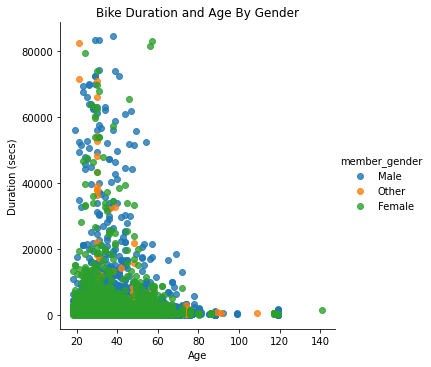

In [54]:
#multivariate plot: duration_sec vs age hue: gender
g = sns.FacetGrid(data=gobike_copy,hue='member_gender',size=5)
g.map(sns.regplot,'member_age','duration_sec',fit_reg=False,x_jitter=0.04)
g.add_legend()
plt.xlabel('Age')
plt.ylabel('Duration (secs)')
plt.title('Bike Duration and Age By Gender')

The above plot shows invidual with high duration rides are mostly Male in the age range 20's-30's

further analysis to see which other features might affects longer duration rides 



C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Duration and Age By User Type')

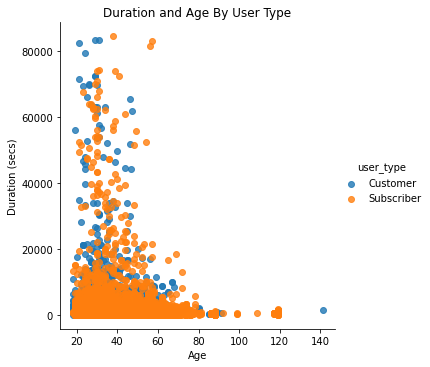

In [51]:
#multivariate plot: duration_sec vs age hue: gender
g = sns.FacetGrid(data=gobike_copy,hue='user_type',size=5)
g.map(sns.regplot,'member_age','duration_sec',fit_reg=False,x_jitter=0.04)
g.add_legend()
plt.xlabel('Age')
plt.ylabel('Duration (secs)')
plt.title('Duration and Age By User Type')

The above plot depecits majority of lower ride duration in between customer and subscriber in the most in the 20's-60's age range.

The higher duration rides are mostly but the <b>customer</b>. This might futher support the bivariate boxplot between duration_sec and user_type being there is a correlation between high duration ride and user type customer, with the individuals in their 20's

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Bike Duration Ride and Hours By User Type')

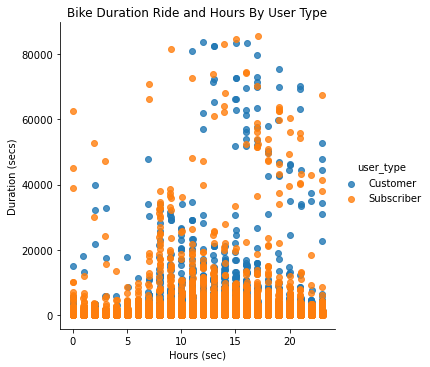

In [53]:
#multivariate plot: duration_sec vs age hue: gender
g = sns.FacetGrid(data=gobike_copy,hue='user_type',size=5)
g.map(sns.regplot,'hour_start_time','duration_sec',fit_reg=False,x_jitter=0.04)
g.add_legend()
plt.xlabel('Hours (sec)')
plt.ylabel('Duration (secs)')
plt.title('Bike Duration Ride and Hours By User Type')

The most time a ride is booked by user_type(customer and subcriber) is during 8:00 & 9:00 and most of the customer high bike ride always begin mostly from 12:00 noon

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
further analysis from the bivariate plot of Bike duration ride and user_type further shows most long duriation rides are by customers in the age range 20's-30's

### Were there any interesting or surprising interactions between features?
The multivariate plot shows user_type ride is most around the time 8:00 with longer bike duration ride close to 11hrs

## Findings

There is close no(zero) correlation between the Bike ride duration and other quantitative variables where further analysis were done with qualitative variable to check for relationship

The boxplot showing the relationship between duration_sec and user_type indicates that most high duration are done mostly by the user_type customer which was futher approved by a multivariate regplot showing most long duriation rides are by customers in the age range 20's-30's

Also longer bike ride duration usually start on weekdays i.e friday,saturday and sunday


Moreover outside of the main variables there  appears to be a very strong correlation between hour_start_time and hour_end_time i.e (the relationship between the time an individual start and end a bike ride is positively correlated)
Also strong positive correlation between the day_start_time and day_end_time i.e it can be predicted the day an individual will end a ride based on the day the individual starts the ride